In [1]:
import datetime
import pandas as pd

In [4]:
dt = datetime.datetime(year=2021, month=9, day=23, hour=11, minute=24)
dt
print(dt)

2021-09-23 11:24:00


In [5]:
ts = pd.Timestamp(dt)
ts

Timestamp('2021-09-23 11:24:00')

In [11]:
print('year: ', ts.year)
print('month: ', ts.month)
print('day: ', ts.day)
print('hour: ', ts.hour)
print('minute: ', ts.minute)
print('second: ', ts.second)
print('weekday: ', ts.weekday())

year:  2021
month:  9
day:  23
hour:  11
minute:  24
second:  0
weekday:  3


In [8]:
# 计算7天以后的时间
ts + pd.Timedelta('7 days')

Timestamp('2021-09-30 11:24:00')

In [9]:
# 把字符串转换为datetime类型
pd.to_datetime('2021-09-23')

Timestamp('2021-09-23 00:00:00')

In [13]:
# 生成一个时间序列
pd.Series(pd.date_range(start='2021-09-23', periods=7, freq='24H'))

0   2021-09-23
1   2021-09-24
2   2021-09-25
3   2021-09-26
4   2021-09-27
5   2021-09-28
6   2021-09-29
dtype: datetime64[ns]

In [15]:
df = pd.read_csv('./data/flowdata.csv')
df

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...,...
11692,2013-01-01 12:00:00,1.710000,1.710000,0.129583
11693,2013-01-01 15:00:00,1.420000,1.420000,0.096333
11694,2013-01-01 18:00:00,1.178583,1.178583,0.083083
11695,2013-01-01 21:00:00,0.898250,0.898250,0.077167


In [16]:
# 把时间字符串转换为datetime格式，并设置为索引
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')
df

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [18]:
# 在读取数据的时候，就同时把Time作为索引
df = pd.read_csv('./data/flowdata.csv', index_col=0, parse_dates=True)
df

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [23]:
# 切片
df[pd.Timestamp('2012-01-01'):pd.Timestamp('2012-01-02')]
# 等价于
df[('2012-01-01 00:00'):('2012-01-02 00:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083
2012-01-01 21:00:00,0.355417,0.346500,0.080917
2012-01-02 00:00:00,1.069333,0.970000,0.071917


In [27]:
# 条件筛选
df[(df.index.hour >= 6) & (df.index.hour <= 12)]
# 等价于
df.between_time('06:00', '12:00')

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-02 06:00:00,0.112917,0.091417,0.016333
2009-01-02 09:00:00,0.141917,0.097083,0.016417
...,...,...,...
2012-12-31 09:00:00,0.682750,0.682750,0.066583
2012-12-31 12:00:00,0.651250,0.651250,0.063833
2013-01-01 06:00:00,2.220833,2.220833,0.166917


In [29]:
# 按日期计算平均值
df.resample('D').mean()

# 每隔3天
df.resample('3D').mean()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.120906,0.091201,0.016378
2009-01-04,0.121594,0.091708,0.016670
2009-01-07,0.097042,0.070740,0.014479
2009-01-10,0.115941,0.086340,0.014545
2009-01-13,0.346962,0.364549,0.034198
...,...,...,...
2012-12-20,0.996337,0.996337,0.114472
2012-12-23,2.769059,2.769059,0.225542
2012-12-26,1.451583,1.451583,0.140101


In [30]:
# 按月份计算平均值
df.resample('M').mean()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,0.517864,0.536660,0.045597
2009-02-28,0.516847,0.529987,0.047238
2009-03-31,0.373157,0.383172,0.037508
2009-04-30,0.163182,0.129354,0.021356
2009-05-31,0.178588,0.160616,0.020744
2009-06-30,0.105912,0.087479,0.014576
2009-07-31,0.080798,0.066354,0.011641
2009-08-31,0.054130,0.059866,0.009284
2009-09-30,0.027466,0.043067,0.008322


<AxesSubplot:xlabel='Time'>

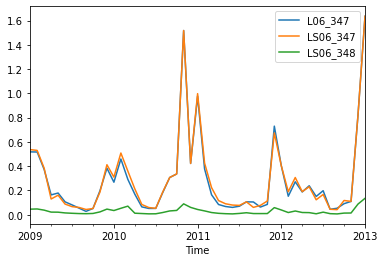

In [31]:
# 绘图
df.resample('M').mean().plot()